In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# stat models for performing linear regression
import statsmodels.api as sm


In [3]:
# We will use this class to generate the data
class DataGenerator:
    ## n_x: the dimensions of x
    ## n_y: the dimensions of y
    def __init__(self, n_x: int, n_y: int):
        self.n_x = n_x
        self.n_y = n_y
    ## n_data: the amount of data to generate 
    def generate(self, n_data):
        pass

# Linear model

We use a design matrix $B \in \mathbb{R}^{n \times m}$ and a covariance matrix $\Sigma \in \mathbb{R}^{n \times n}$ to generate data of the form
$$y = B x + \omega$$, 
where $\omega \sim N(0, \Sigma)$ and $x$ is uniformly generated on a bounded interval.

This can also be written as
$$ y \mid x, B, \Sigma \sim N(B x, \Sigma)$$

With
$$ x \sim \textrm{Uniform}([x_{\min}, x_{\max}])$$


In [4]:
# This class generates data from a linear model
class LinearModelGenerator(DataGenerator):
    def __init__(self, n_x: int, n_y: int):
        super().__init__(n_x, n_y)
        ## We use a matrix to generate data of the form
        ## $y = B x + \omega$, where $\omega \sim N(0, \sigma)$.
        self.Beta = np.random.normal(size = [n_x + 1,  n_y])
        self.sigma = np.random.gamma(1)
    def generate(self, n_data, x_min : float = -1, x_max : float = 1):
        X = np.random.uniform(size=[n_data, self.n_x]) * (x_max - x_min) + x_min
        Y = np.zeros([n_data, self.n_x])
        for t in range(n_data):
            x = np.append(X[t, :], 1)
            #print(self.Beta.shape, x.shape, np.dot(x, self.Beta))
            Y[t, :] = np.dot(x, self.Beta) + self.sigma * np.random.normal(size=[1, self.n_y])
            
        return X, Y

In [25]:
# Initialise the generator for one-dimensional X and Y
generator = LinearModelGenerator(1, 1)
generator.Beta

array([[-1.10756613],
       [ 2.65524053]])

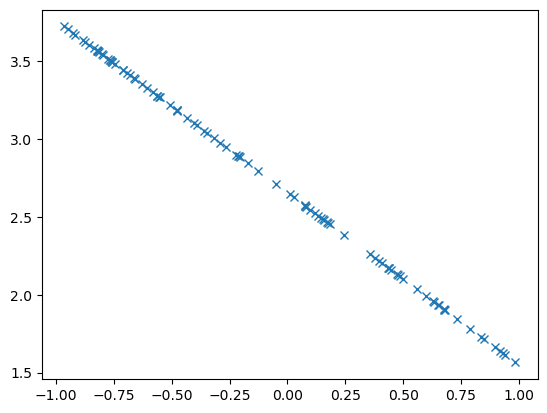

In [26]:
generator.sigma = 0.0
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

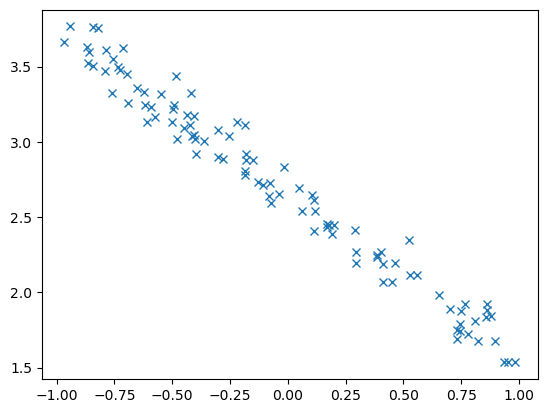

In [29]:
generator.sigma = 0.1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

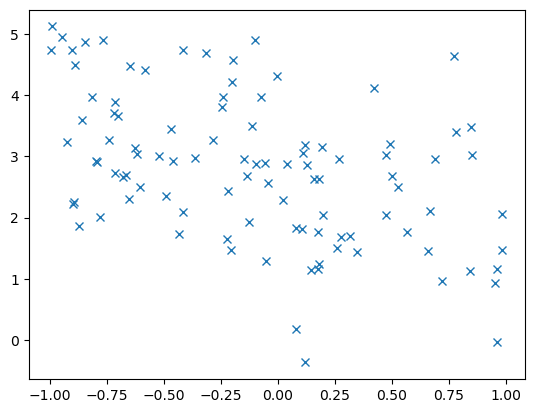

In [35]:
generator.sigma = 1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

(100,)


ValueError: 'yerr' must not contain negative values

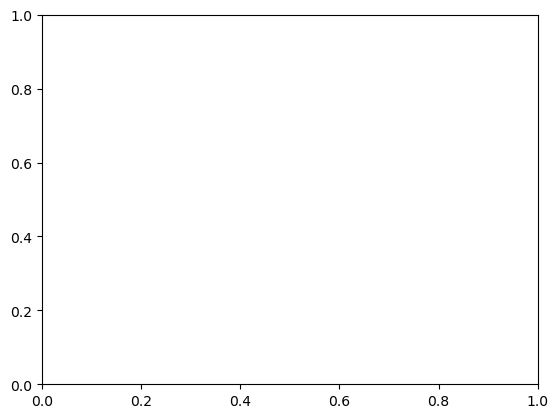

In [36]:
generator.sigma = 0.1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')
Xa = sm.add_constant(X)
model = sm.OLS(Y, Xa)
results = model.fit() 
Z = Y.copy()
residual = Y.copy()
for t in range(Xa.shape[0]):
    X[t]
    z = results.get_prediction(Xa[t])
    Z[t] = z.predicted_mean
residual = (Z - Y).reshape(-1)
print(residual.shape)
#plt.plot(X.reshape(-1), Y.reshape(-1), 'x')
plt.clf()
plt.errorbar(X.reshape(-1), Z.reshape(-1), yerr=residual, capsize=0, uplims=True, linewidth=0.5)
plt.plot(X, Z)
plt.axis([-1,1,-3,3])
plt.savefig("linear_fit.pdf")

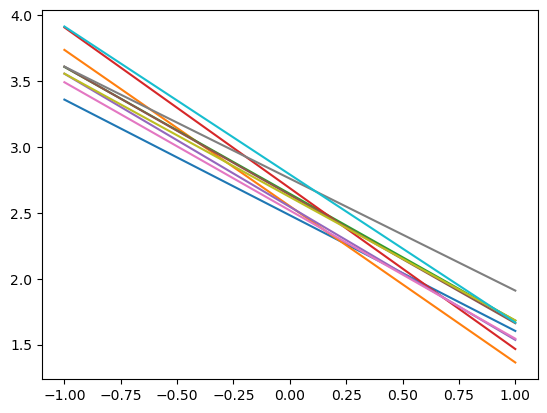

In [42]:
# Now let us plot 10 different lines, one each for every random sample
n_tests = 10
generator.sigma = 10
for test in range(n_tests):
    X, Y = generator.generate(10000)
    Xa = sm.add_constant(X)
    # get a model from the random sample
    model = sm.OLS(Y, Xa)
    results = model.fit() 
    # get predictions for x = -1, 1
    left = results.get_prediction([1,-1])
    right = results.get_prediction([1,+1])
    plt.plot([-1, 1], [left.predicted_mean, right.predicted_mean])

In [43]:

# This class generates data from a simple non-linear model
class KernelModelGenerator(DataGenerator):
    def __init__(self, n_x: int, n_y: int, n_centers: int):
        super().__init__(n_x, n_y)
        ## We use a matrix to generate data of the form
        ## $y = B x + \omega$, where $\omega \sim N(0, \sigma$.
        ## Alternatively, we can write this as
        self.C = np.random.normal(size = [n_centers, n_x])
        self.Z = np.random.normal(size = [n_centers, n_y])
        self.n_centers = n_centers
        self.sigma = 1
    def generate(self, n_data, x_min : float = -1, x_max : float = 1):
        X = np.random.uniform(size=[n_data, self.n_x]) * (x_max - x_min) + x_min
        Y = np.zeros([n_data, self.n_x])
        for t in range(n_data):
            x = X[t, :]
            D = np.array([np.linalg.norm(x - self.C[c]) for c in range(self.n_centers)])
            Y[t, :] =  np.dot(np.exp(-D), self.Z) + self.sigma * np.random.normal(size=self.n_y) 
        return X, Y

In [44]:

generator = KernelModelGenerator(1, 1, 10)

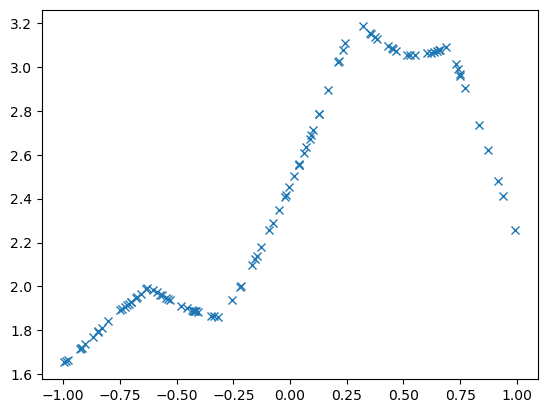

In [45]:
generator.sigma = 0
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

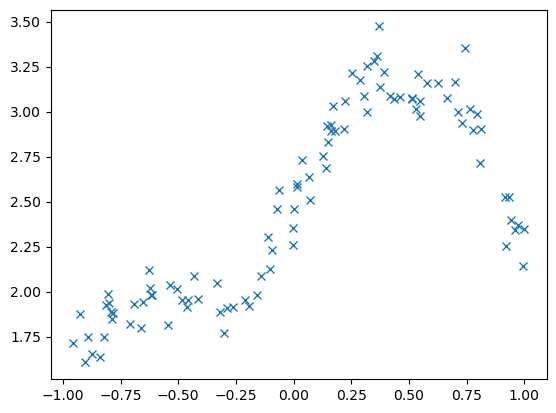

In [51]:
generator.sigma = 0.1
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

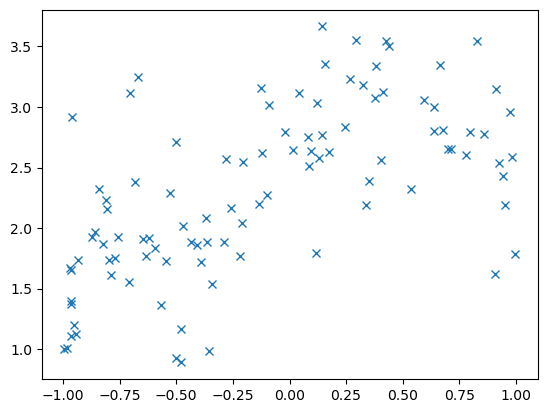

In [55]:
generator.sigma = 0.5
X, Y = generator.generate(100)
plt.plot(X, Y, 'x')

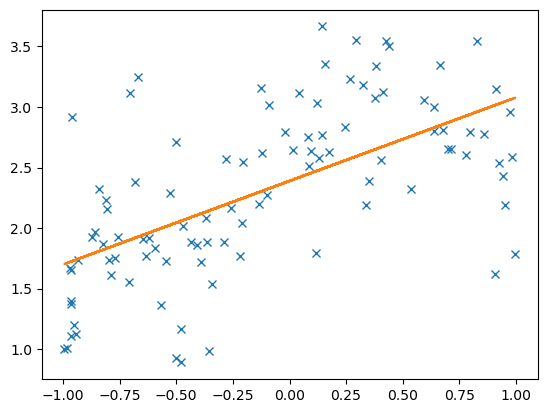

In [56]:
Xa = sm.add_constant(X)
model = sm.OLS(Y, Xa)
results = model.fit() 
Z = Y.copy()
for t in range(X.shape[0]):
    z = results.get_prediction(Xa[t])
    Z[t] = z.predicted_mean
plt.plot(X, Y, 'x')
plt.plot(X, Z)
plt.savefig("nonlinear_fit.pdf")

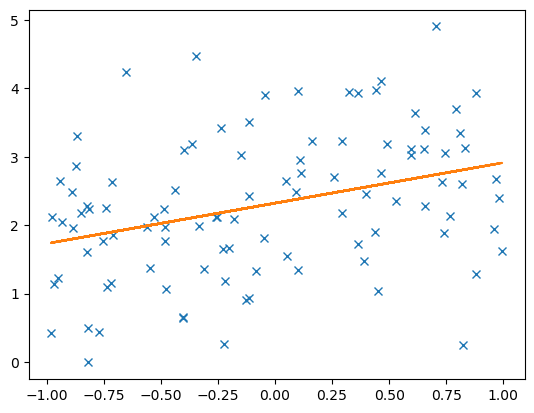

In [49]:
from sklearn.linear_model import LinearRegression
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
model = LinearRegression().fit(X, Y) # use X as is
Z = model.predict(X)
plt.plot(X, Y, 'x')
plt.plot(X, Z)
plt.savefig("nonlinear_fit_sklearn.pdf")

In [50]:
X

array([[ 0.1629134 ],
       [-0.40497595],
       [ 0.11213589],
       [ 0.443666  ],
       [-0.8246763 ],
       [-0.73986591],
       [-0.43922854],
       [ 0.96608913],
       [ 0.29451817],
       [ 0.99458328],
       [ 0.46579222],
       [ 0.09023413],
       [-0.52769681],
       [-0.48002156],
       [ 0.82370639],
       [-0.48408422],
       [ 0.6584907 ],
       [ 0.8804602 ],
       [-0.23806665],
       [-0.21667966],
       [-0.04164986],
       [-0.94258488],
       [-0.18083997],
       [-0.25551037],
       [ 0.88172773],
       [-0.75440401],
       [ 0.81866508],
       [ 0.1016515 ],
       [-0.88671193],
       [-0.36314117],
       [-0.48220141],
       [-0.22968844],
       [ 0.80923945],
       [-0.11370957],
       [-0.85152407],
       [-0.81538475],
       [ 0.6589361 ],
       [-0.39778182],
       [ 0.59645221],
       [-0.87114928],
       [-0.11483828],
       [-0.96969618],
       [-0.76982292],
       [ 0.65290851],
       [ 0.52924547],
       [ 0